In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go

### Importamos libreria de yahoo

In [2]:
import yfinance as yf

### Bajamos datos de las tecnologicas

In [34]:
ticker = ['XLK']
tecnologicas = yf.download(ticker, start='2000-01-01', end='2023-03-24')

[*********************100%***********************]  1 of 1 completed


In [35]:
tech = pd.DataFrame(tecnologicas)

In [36]:
tech

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,55.625000,55.625000,53.500000,55.437500,42.116337,938100
2000-01-04,54.000000,54.750000,52.312500,52.625000,39.979652,545500
2000-01-05,51.750000,53.062500,50.125000,51.843750,39.386127,1906000
2000-01-06,51.250000,52.093750,49.625000,50.125000,38.080368,1670000
2000-01-07,49.625000,51.000000,49.125000,51.000000,38.745117,686000
...,...,...,...,...,...,...
2023-03-17,143.940002,145.179993,142.619995,143.460007,143.144012,11539300
2023-03-20,142.889999,143.710007,141.820007,143.529999,143.529999,5990800
2023-03-21,144.309998,144.949997,142.809998,144.690002,144.690002,6533200


In [37]:
tech.to_csv('./tecnologicas.csv')

## Traemos las 500 empresas del SP500

In [6]:
# Obtener todos los símbolos de acciones del S&P 500 junto con su sector y subsector
urlEmpresa = 'https://es.wikipedia.org/wiki/Anexo:Compa%C3%B1%C3%ADas_del_S%26P_500'
sp500_empresas = pd.read_html(urlEmpresa, encoding='utf8')[2][['Símbolo', 'Sector GICS', 'Sub-industria GICS']]
sp500_empresas.rename(columns={'Símbolo': 'Symbol', 'Sector GICS': 'Sector', 'Sub-industria GICS': 'Subsector'}, inplace=True)
sp500_empresas['Symbol'] = sp500_empresas['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

# Definir el rango de fechas
start_date = '2000-01-01'
end_date = '2023-03-25'

# Crear un DataFrame vacío para almacenar los datos
sp500_data = pd.DataFrame()

# Iterar a través de cada empresa del S&P 500 y agregar los datos
for _, empresa in sp500_empresas.iterrows():
    symbol = empresa['Symbol']
    sector = empresa['Sector']
    subsector = empresa['Subsector']
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        data['Sector'] = sector
        data['Subsector'] = subsector
        sp500_data = sp500_data.append(data)

# Filtrar los datos por subsector
subsectors = sp500_data['Subsector'].unique() #label de subsector
subsector_data = {}  #diccionario
for subsector in subsectors:
    subsector_data[subsector] = sp500_data[sp500_data['Subsector'] == subsector]

# Obteniendo los datos de solo el sp500
sp500_index = yf.download('^GSPC', start=start_date, end=end_date)

Descargando datos para MMM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AOS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ACN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ATVI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADBE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AES...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AFL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para A...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AKAM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ARE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALGN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALLE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LNT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ALL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GOOGL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GOOG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMZN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMCR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AEE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AEP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AXP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AIG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AWK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ABC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AME...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMGN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ANSS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AON...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AAPL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AMAT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para APTV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ACGL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ANET...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AJG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AIZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para T...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ATO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ADSK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AZO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BKR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BALL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BAC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BBWI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BAX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BDX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WRB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BRK-B...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BBY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BIO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TECH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BIIB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BLK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BKNG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BWA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BXP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BSX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BMY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para AVGO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BRO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BF-B...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CHRW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CDNS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CZR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KMX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CCL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CARR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTLT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CBOE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CBRE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CDW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CNC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CNP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CDAY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CRL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SCHW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CHTR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CVX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CHD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CINF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTAS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSCO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para C...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CFG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CLX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CME...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTSH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMCSA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CAG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ED...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CEG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CPRT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GLW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTVA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSGP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para COST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CTRA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CCI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CSX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CMI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CVS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DHI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DHR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DRI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DVA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DAL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XRAY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DVN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DXCM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FANG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DLR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DFS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DISH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DIS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DLTR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para D...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DPZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DOV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DOW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DTE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DUK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DXC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EMN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EBAY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ECL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EIX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ELV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LLY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EMR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ENPH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EOG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EPAM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EFX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQIX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EQR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ESS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ETSY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EVRG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ES...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXPE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXPD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para EXR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XOM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FFIV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FDS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FAST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FRT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FDX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



Descargando datos para FITB...
[*********************100%***********************]  1 of 1 completed
Descargando datos para FRC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FSLR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FIS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FISV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FLT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FMC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para F...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FTNT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FTV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FOXA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FOX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para BEN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para FCX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GRMN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GEHC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GEN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GNRC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GIS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GPC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GILD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GPN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HAL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HIG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HAS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HCA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEAK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HSIC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HSY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HES...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HPE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HLT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HOLX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HON...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HRL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HWM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HPQ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HUM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HBAN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para HII...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IBM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IEX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IDXX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ITW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ILMN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INCY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INTC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ICE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IPG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IFF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INTU...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ISRG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IVZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para INVH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IQV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para IRM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JBHT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JKHY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para J...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JNJ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JCI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JPM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para JNPR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para K...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KDP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KEY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KEYS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KMB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KIM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KMI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KLAC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KHC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para KR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LHX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LRCX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LVS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LDOS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LEN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LNC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LIN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LYV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LKQ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LMT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para L...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LOW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LUMN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LYB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MPC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MKTX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MAR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MMC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MLM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MAS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTCH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MKC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MDT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para META...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MET...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MTD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MGM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCHP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MU...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSFT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MAA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MRNA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MHK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MOH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TAP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MDLZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MPWR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MNST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MCO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MOS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para MSCI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NDAQ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NTAP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NFLX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NWL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NEM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NWSA...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para NWS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NEE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NKE...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para NI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NDSN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NSC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NTRS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NOC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NCLH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NRG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NUE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NVDA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NVR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NXPI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ORLY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OXY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ODFL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OMC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ON...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OKE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ORCL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OGN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para OTIS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PCAR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PKG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PARA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PAYX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PAYC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PYPL...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para PNR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PKI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PFE...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para PCG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PSX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PNW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PXD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PNC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para POOL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PPG...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para PPL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PFG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PGR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PLD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PRU...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PEG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PTC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PSA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para PHM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para QRVO...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para PWR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para QCOM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para DGX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RL...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para RJF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para RTX...
[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para O...
[*********************100%***********************]  1 of 1 completed
Descargando datos para REG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para REGN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para RF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RSG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RMD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RHI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ROST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para RCL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SPGI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para CRM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SBAC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SLB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para STX...
[*********************100%***********************]  1 of 1 completed
Descargando datos para SEE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SRE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para NOW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SHW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SBNY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SPG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SWKS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SJM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SNA...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para SEDG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para LUV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SWK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SBUX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STLD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para STE...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SIVB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYF...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SNPS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para SYY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TMUS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TROW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para TTWO...
[*********************100%***********************]  1 of 1 completed
Descargando datos para TPR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRGP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TGT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TEL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TDY...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TFX...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para TER...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSLA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TXN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TXT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TMO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TJX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSCO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TDG...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRV...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TRMB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TFC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TYL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para TSN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para USB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UDR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ULTA...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para UNP...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UAL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UPS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para URI...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para UNH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para UHS...
[*********************100%***********************]  1 of 1 completed
Descargando datos para VLO...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VTR...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRSN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRSK...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VZ...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VRTX...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VFC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para VTRS...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para VICI...
[*********************100%***********************]  1 of 1 completed
Descargando datos para V...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para VMC...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para WAB...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WBA...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para WMT...
[*********************100%***********************]  1 of 1 completed
Descargando datos para WBD...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para WM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para WAT...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WEC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WFC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WELL...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para WST...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WDC...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para WRK...
[*********************100%***********************]  1 of 1 completed
Descargando datos para WY...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para WHR...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para WMB...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para WTW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para GWW...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para WYNN...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XEL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para XYL...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para YUM...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZBRA...

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)



[*********************100%***********************]  1 of 1 completed
Descargando datos para ZBH...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed
Descargando datos para ZION...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


Descargando datos para ZTS...
[*********************100%***********************]  1 of 1 completed


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18408\2999487228.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_data = sp500_data.append(data)


[*********************100%***********************]  1 of 1 completed


In [8]:
sp500_index.to_csv('./indice.csv')
#sp500_data.to_csv('./sp500.csv', index=False)

In [99]:
sp500_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-14,4126.700195,4159.770020,4095.010010,4136.129883,4136.129883,3929200000
2023-02-15,4119.500000,4148.109863,4103.979980,4147.600098,4147.600098,4075980000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000


In [102]:
sp500_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5821 entries, 2000-01-03 to 2023-02-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5821 non-null   float64
 1   High       5821 non-null   float64
 2   Low        5821 non-null   float64
 3   Close      5821 non-null   float64
 4   Adj Close  5821 non-null   float64
 5   Volume     5821 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.3 KB


In [ ]:
#sp500_data = sp500_index['Date']= pd.to_datetime(sp500_index['Date'])

In [87]:
'''index_sp500 = pd.read_csv('./indice.csv')
sp500_completo = pd.read_csv('./sp500.csv')'''

### Vemos la cantidad de registros

In [12]:
print('La cantidad de filas del indice completo son:', sp500_completo.shape[0])
print('La cantidad de columnas del indice completo son:', sp500_completo.shape[1])

La cantidad de filas del indice completo son: 2616662
La cantidad de columnas del indice completo son: 10


In [13]:
print('La cantidad de filas del indice son:', index_sp500.shape[0])
print('La cantidad de columnas del indice son:', index_sp500.shape[1])

La cantidad de filas del indice son: 5821
La cantidad de columnas del indice son: 7


### Ponemos a Date como indice

In [19]:
#cambiamos al indice completo y ponemos como indice a date y lo ponemos en el formato correcto
sp500_completo.set_index('Date', inplace=True)
sp500_completo.index= pd.to_datetime(sp500_completo.index)

In [ ]:
index_sp500 = index_sp500.set_index('Date')
index_sp500['Date']= pd.to_datetime(index_sp500['Date'])


### Hacemos un analisis descriptivo de todas las variables

<function matplotlib.pyplot.show(close=None, block=None)>

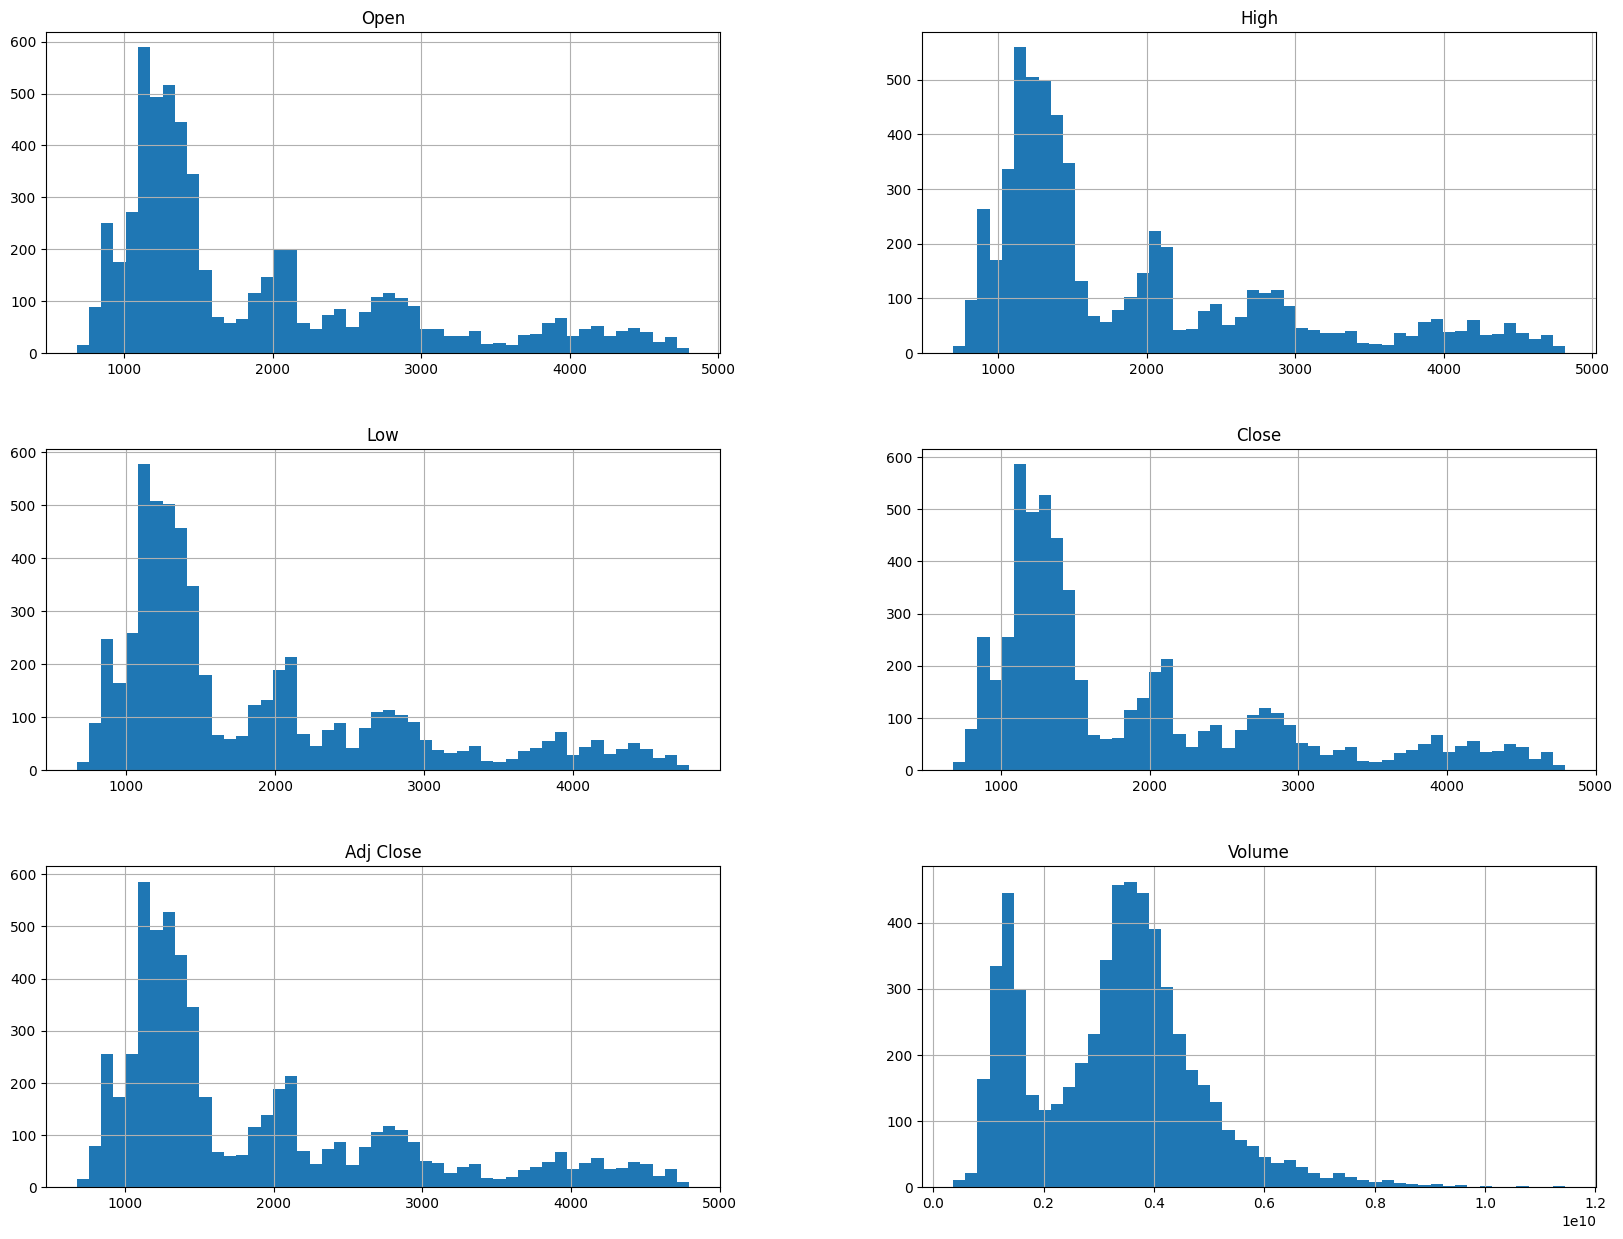

In [104]:
sp500_index.hist(bins=50, figsize=(20,15))
plt.show

### Agregamos columnas nuevas con las que podriamos trabajar

In [110]:
#nombre del dia
sp500_index['Day_Name'] = sp500_index.index.day_name()

# Tasa del retorno activo
sp500_index['Daily Return'] = sp500_index['Adj Close'].pct_change()

In [185]:
sp500_index.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Name,Daily Return
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,Monday,NaN
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,Tuesday,-0.038345
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,Wednesday,0.001922
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,Thursday,0.000956
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,Friday,0.027090
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,Monday,0.011190
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000,Tuesday,-0.013063


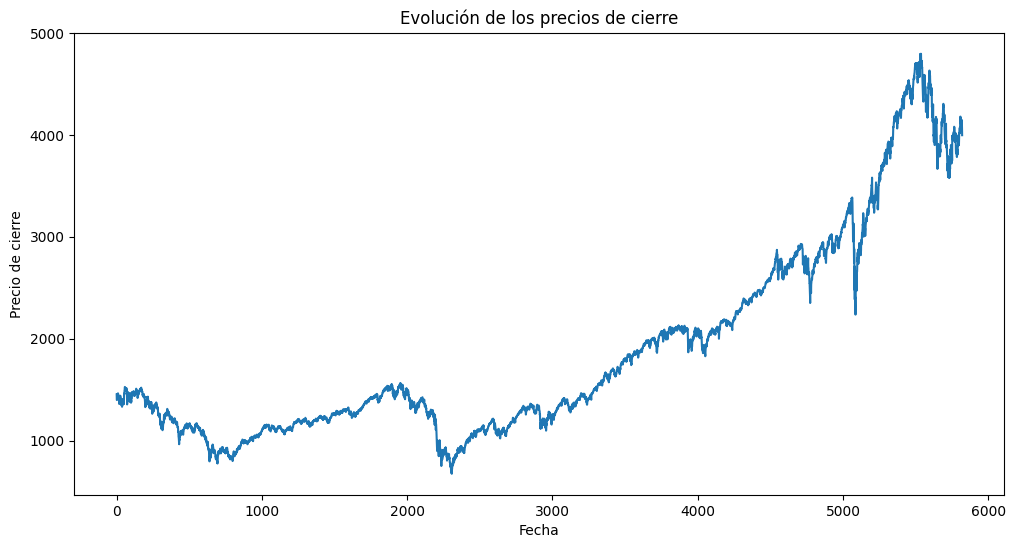

In [186]:
#Evolución de precios de cierre los ultimos 23 anios
close_data = sp500_index["Close"]

plt.figure(figsize=(12,6))
plt.plot(close_data.index, close_data)
plt.title("Evolución de los precios de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.show()

In [184]:
sp500_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5821 non-null   datetime64[ns]
 1   Open          5821 non-null   float64       
 2   High          5821 non-null   float64       
 3   Low           5821 non-null   float64       
 4   Close         5821 non-null   float64       
 5   Adj Close     5821 non-null   float64       
 6   Volume        5821 non-null   int64         
 7   Day_Name      5821 non-null   object        
 8   Daily Return  5820 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 409.4+ KB


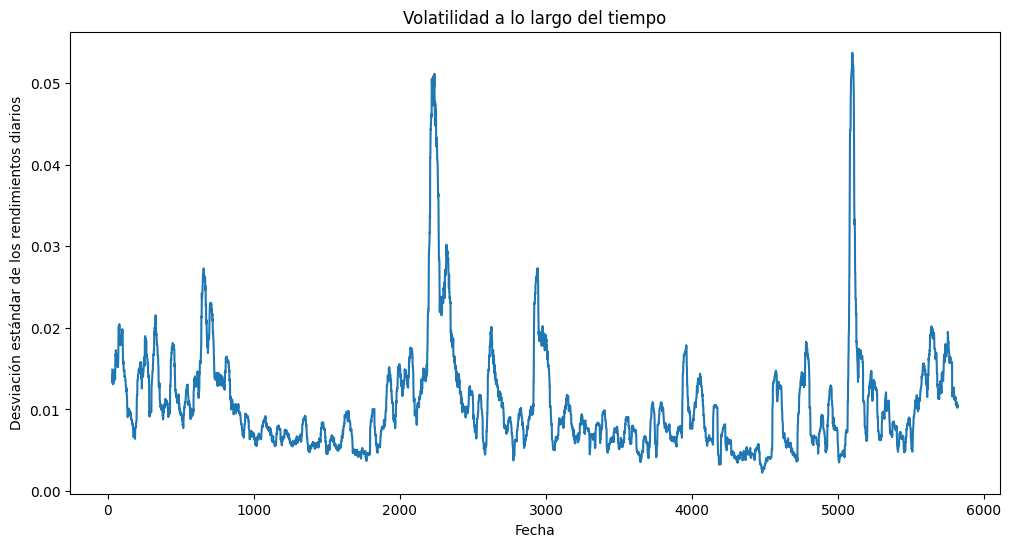

In [183]:
#Análisis de la volatilidad a lo largo del tiempo en precios de cierre

# Calcular los rendimientos diarios
daily_performance = sp500_index["Close"].pct_change()

rolling_volatility = daily_performance.rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility)
plt.title("Volatilidad a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar de los rendimientos diarios")
plt.show()

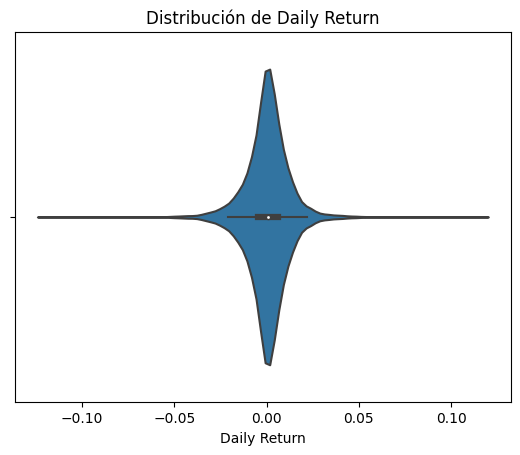

In [116]:
sns.violinplot(data=sp500_index , x='Daily Return')
plt.title('Distribución de Daily Return')
plt.xlabel('Daily Return')
plt.show()


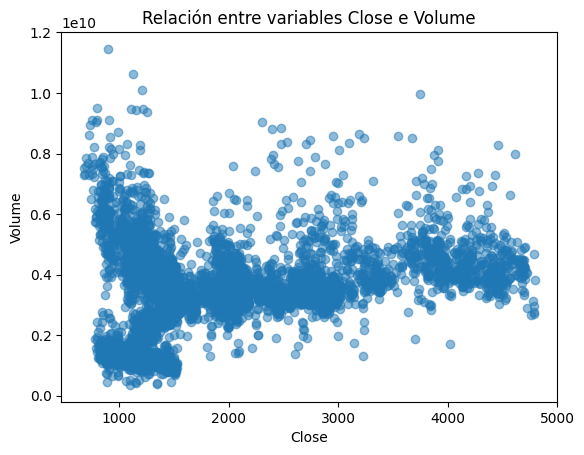

In [126]:
plt.scatter(sp500_index['Close'], sp500_index['Volume'], alpha=0.5)
plt.title('Relación entre variables Close e Volume')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()


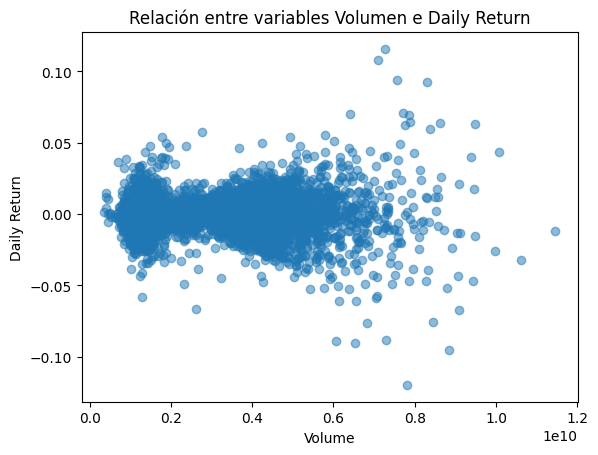

In [125]:
plt.scatter(sp500_index['Volume'], sp500_index['Daily Return'], alpha=0.5)
plt.title('Relación entre variables Volumen e Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.show()

In [203]:
#volatilidad en varios periodos
sp500_index['volatility_1m'] = sp500_index['Daily Return'].rolling(window=21).std() * (252 ** 0.5)
sp500_index['volatility_3m'] = sp500_index['Daily Return'].rolling(window=63).std() * (252 ** 0.5)
sp500_index['volatility_6m'] = sp500_index['Daily Return'].rolling(window=126).std() * (252 ** 0.5)
sp500_index['volatility_1y'] = sp500_index['Daily Return'].rolling(window=252).std() * (252 ** 0.5)


# Crear un gráfico interactivo de la volatilidad en diferentes períodos de tiempo
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp500_index.index, y=sp500_index['volatility_1m'], name='1 month'))
fig.add_trace(go.Scatter(x=sp500_index.index, y=sp500_index['volatility_3m'], name='3 months'))
fig.add_trace(go.Scatter(x=sp500_index.index, y=sp500_index['volatility_6m'], name='6 months'))
fig.add_trace(go.Scatter(x=sp500_index.index, y=sp500_index['volatility_1y'], name='1 year'))

fig.update_layout(title='Volatility of S&P 500 Index in Different Time Periods',
                  xaxis_title='Date',
                  yaxis_title='Volatility',
                  yaxis_tickformat = '%',
                  xaxis_rangeslider_visible=True,
                  plot_bgcolor='black',
                  xaxis=dict(linecolor='white', showgrid=False),
                  yaxis=dict(linecolor='white', showgrid=False),)

fig.show()

### Agregamos otras columnas con datos para analizarlos

In [147]:
#importamos 
sp500 = pd.read_csv('./indice.csv')

In [149]:
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [152]:
sp500.insert(loc=1, column='Year', value=(sp500['Date'].dt.year))
sp500.insert(loc=2, column='Month', value=(sp500['Date'].dt.month))
sp500.insert(loc=9, column='Revenue', value=(sp500['Adj Close'] - sp500['Open']))

In [155]:
sp500.insert(loc=3, column='Week', value=(sp500['Date'].dt.week))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25344\582675898.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [157]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5821 non-null   datetime64[ns]
 1   Year       5821 non-null   int64         
 2   Month      5821 non-null   int64         
 3   Week       5821 non-null   int64         
 4   Open       5821 non-null   float64       
 5   High       5821 non-null   float64       
 6   Low        5821 non-null   float64       
 7   Close      5821 non-null   float64       
 8   Adj Close  5821 non-null   float64       
 9   Volume     5821 non-null   int64         
 10  Revenue    5821 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 500.4 KB


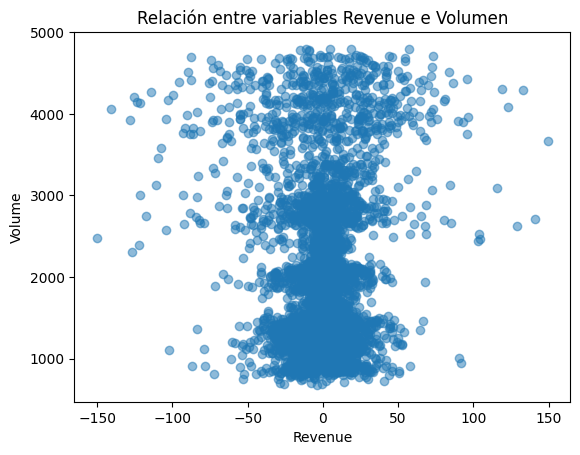

In [181]:
plt.scatter(sp500['Revenue'], sp500['Close'], alpha=0.5)
plt.title('Relación entre variables Revenue e Volumen')
plt.xlabel('Revenue')
plt.ylabel('Volume')
plt.show()

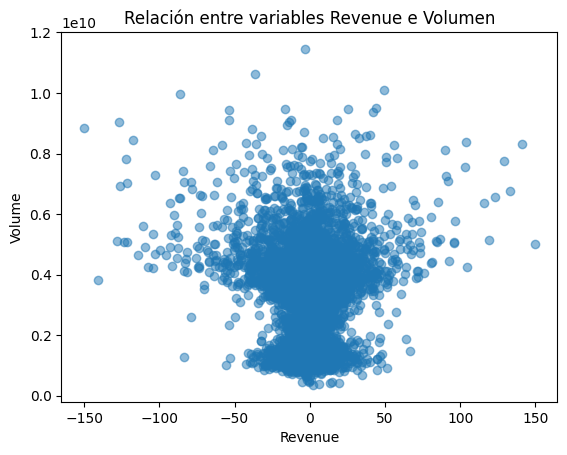

In [179]:
plt.scatter(sp500['Revenue'], sp500['Volume'], alpha=0.5)
plt.title('Relación entre variables Revenue e Volumen')
plt.xlabel('Revenue')
plt.ylabel('Volume')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25344\1457692352.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



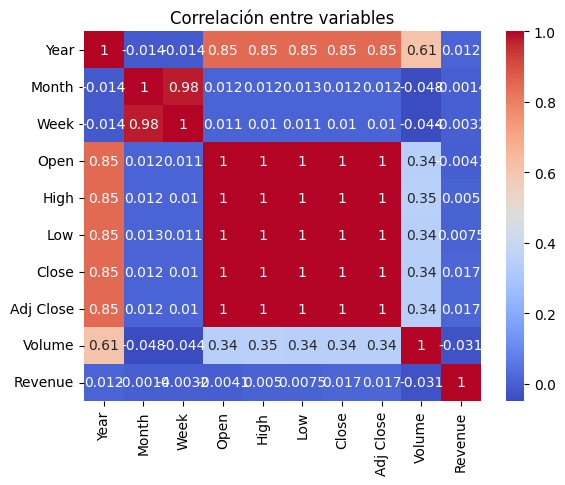

In [161]:
sns.heatmap(sp500.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [173]:
# filtramos el revenue semanal
sp500_w = sp500.groupby(['Year' , 'Month', 'Week']).Revenue.sum()
sp500_w = sp500_w.reset_index()
sp500_w.tail(30)

,Year,Month,Week,Revenue
1332,2022,8,35,-104.729980
1333,2022,9,35,-40.279785
1334,2022,9,36,138.400391
1335,2022,9,37,-111.089600
1336,2022,9,38,-109.070068
1337,2022,9,39,-94.129639
1338,2022,10,40,68.619873
1339,2022,10,41,-13.740234
1340,2022,10,42,77.449707
1341,2022,10,43,165.040527


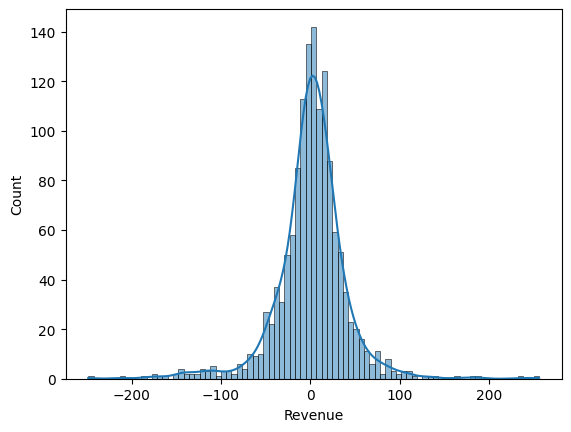

In [174]:
sns.histplot(x = 'Revenue', data= sp500_w, kde = True)
plt.show()

In [175]:
sp500_y = sp500.groupby('Year').Revenue.sum()
sp500_y = sp500_y.reset_index()
sp500_y

,Year,Revenue
0,2000,-151.220093
1,2001,-174.789917
2,2002,-256.230103
3,2003,231.989990
4,2004,99.269897
5,2005,35.879761
6,2006,175.359985
7,2007,56.720581
8,2008,-502.179749
9,2009,258.129761


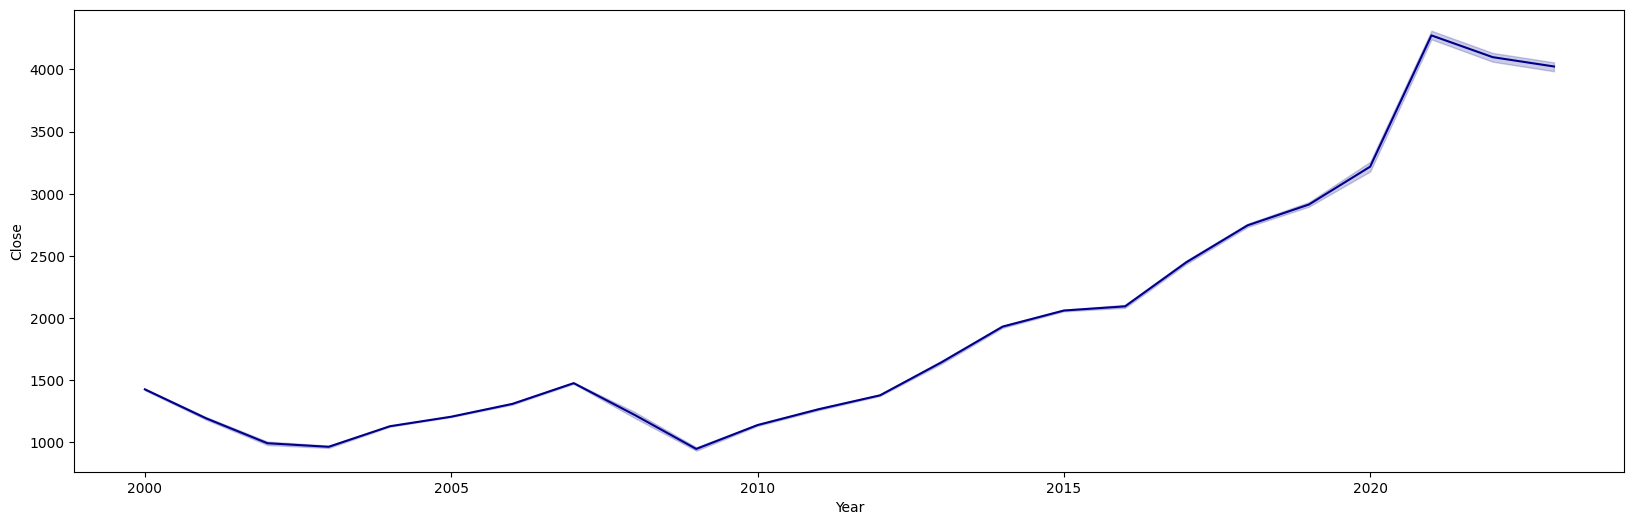

In [178]:
#Evolución anual de precios de cierre los ultimos 23 anios
plt.subplots(figsize=(20, 6))
sns.lineplot(data= sp500, x= 'Year', y= 'Close', color='darkblue' )
plt.show()

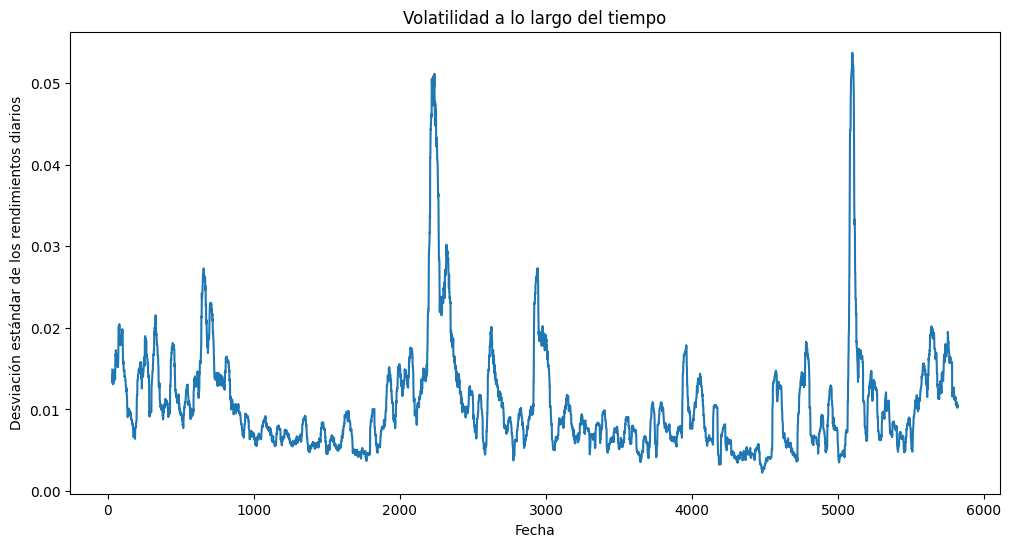

In [182]:
#Análisis de la volatilidad a lo largo del tiempo en precios de cierre

# Calcular los rendimientos diarios
daily_performance = sp500["Close"].pct_change()

rolling_volatility = daily_performance.rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility)
plt.title("Volatilidad a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar de los rendimientos diarios")
plt.show()

In [196]:
#Separamos los datos del ultimo año
sp500_sem = sp500.tail(7)
#Separamos los datos de los ultimos 2 años
sp500_mes = sp500.tail(30)
#Separamos los datos del ultimo año
sp500_1y = sp500.tail(360)
#Separamos los datos de los ultimos 2 años
sp500_2y = sp500.tail(720)
#Separamos los datos por los ultimos 5 anios
syp500_5y = sp500.tail(1800)


In [198]:
#Grafico de velas de los ultima semana
candlestick = go.Candlestick(
                  x     = sp500_mes.index,
                  open  = sp500_mes.Open,
                  close = sp500_mes.Close,
                  low   = sp500_mes.Low,
                  high  = sp500_mes.High,
              )
fig = go.Figure(candlestick)
fig.show()

In [190]:
#Grafico de velas de los 23 anios
candlestick = go.Candlestick(
                  x     = sp500.index,
                  open  = sp500.Open,
                  close = sp500.Close,
                  low   = sp500.Low,
                  high  = sp500.High,
              )
fig = go.Figure(candlestick)
fig.show()

In [188]:
#Grafico de velas de un anio
candlestick = go.Candlestick(
                  x     = sp500_1y.index,
                  open  = sp500_1y.Open,
                  close = sp500_1y.Close,
                  low   = sp500_1y.Low,
                  high  = sp500_1y.High,
              )
fig = go.Figure(candlestick)
fig.show()

In [189]:
#Grafico de velas e 2 anios
candlestick = go.Candlestick(
                  x     = sp500_2y.index,
                  open  = sp500_2y.Open,
                  close = sp500_2y.Close,
                  low   = sp500_2y.Low,
                  high  = sp500_2y.High,
              )
fig = go.Figure(candlestick)
fig.show()

### Analisis de indice completo por sectores

In [14]:
#importamos dataset
SP500Sectores = pd.read_csv('./sp500.csv')

In [15]:
SP500Sectores.set_index('Date', inplace=True)

In [16]:
#Agrego que el indice es una fecha para poder realizar los pasos
SP500Sectores.index = pd.to_datetime(SP500Sectores.index)

In [17]:
SP500Sectores['Day'] = SP500Sectores.index.day_name()
SP500Sectores['Daily Return']=SP500Sectores['Close'].pct_change() 

In [18]:
SP500Sectores.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Subsector,Day,Daily Return
Date,,,,,,,,,,,
2006-09-13,78.632889,79.063095,78.240921,78.594643,47.222149,5146529,IBM,Tecnología Informática,Consultoría Informática y Otros Servicios,Wednesday,-0.000851
2007-11-16,27.950001,28.190001,27.490000,27.790001,16.118628,10124800,BMY,Cuidado de Salud,Farmacéuticos,Friday,0.001441
2002-05-02,14.900000,15.900000,14.900000,15.800000,15.800000,2981200,KMX,Consumo Discrecional,Automotive Retail,Thursday,0.071186
2014-11-19,91.510002,92.000000,89.099998,89.250000,69.754242,1876300,AVGO,Tecnología Informática,Semiconductores,Wednesday,-0.023630
2016-10-17,40.250000,40.459999,40.139999,40.340000,33.407669,2809000,XEL,Utilidades,Multi-Utilities,Monday,0.007241


### Vemos duplicados

In [19]:
SP500Sectores[SP500Sectores.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Subsector,Day,Daily Return
Date,,,,,,,,,,,
2012-05-23,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Materiales,Empaquetado de Papel,Wednesday,0.0
2012-05-24,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Materiales,Empaquetado de Papel,Thursday,0.0
2012-05-25,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Materiales,Empaquetado de Papel,Friday,0.0
2012-05-29,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Materiales,Empaquetado de Papel,Tuesday,0.0
2012-05-30,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Materiales,Empaquetado de Papel,Wednesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2002-02-08,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Servicios de Comunicación,Entretenimiento Doméstico Interactivo,Friday,0.0
2002-02-11,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Servicios de Comunicación,Entretenimiento Doméstico Interactivo,Monday,0.0
2002-02-12,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Servicios de Comunicación,Entretenimiento Doméstico Interactivo,Tuesday,0.0


In [20]:
#Parecen ser 784, eliminamos los duplicados
SP500Sectores.drop_duplicates(inplace = True)

In [22]:
# solo hay un valor faltante y es debido a la forma en que se calcula el 
#daily_return, es decir la variacion del precio del activo 
SP500Sectores.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Symbol          0
Sector          0
Subsector       0
Day             0
Daily Return    1
dtype: int64

In [23]:
SP500Sectores

,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Subsector,Day,Daily Return
Date,,,,,,,,,,,
2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525515,2173400,MMM,Industriales,Conglomerados Industriales,Monday,NaN
2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511263,2713800,MMM,Industriales,Conglomerados Industriales,Tuesday,-0.039735
2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221231,3699400,MMM,Industriales,Conglomerados Industriales,Wednesday,0.028966
2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249762,5975800,MMM,Industriales,Conglomerados Industriales,Thursday,0.080429
2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790695,4101200,MMM,Industriales,Conglomerados Industriales,Friday,0.019851
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS,Cuidado de Salud,Farmacéuticos,Tuesday,0.053696
2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS,Cuidado de Salud,Farmacéuticos,Wednesday,0.018150
2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS,Cuidado de Salud,Farmacéuticos,Thursday,-0.006228


In [24]:
SP500Sectores.to_csv('./sectores.csv')

In [25]:
sectoremp = SP500Sectores.groupby('Sector')['Symbol'].nunique()
sectoremp

Sector
Bienes Raíces                30
Consumo Discrecional         56
Cuidado de Salud             64
Energía                      23
Finanzas                     67
Industriales                 70
Materiales                   29
Productos básicos            33
Servicios de Comunicación    25
Tecnología Informática       76
Utilidades                   30
Name: Symbol, dtype: int64

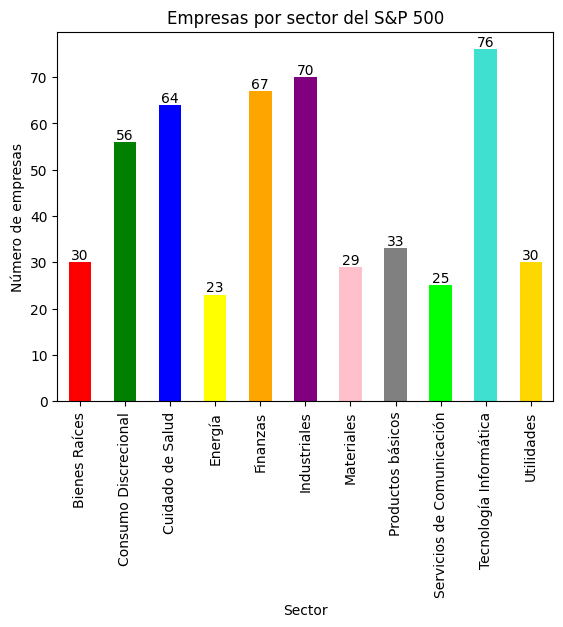

In [28]:
# Cambiar color de las barras
colores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink','gray','lime', 'turquoise','gold']
sectoremp.plot(kind='bar', color=colores)

# Agregar etiquetas a las barras
for i, v in enumerate(sectoremp.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Empresas por sector del S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

plt.show()

In [32]:
#calculamos el rendimiento anual promedio anual
group_data = SP500Sectores.groupby(['Sector', pd.Grouper(freq='Y')])['Adj Close'].mean().reset_index()
group_data

,Sector,Date,Adj Close
0,Bienes Raíces,2000-12-31,14.431688
1,Bienes Raíces,2001-12-31,12.249426
2,Bienes Raíces,2002-12-31,10.750926
3,Bienes Raíces,2003-12-31,12.227121
4,Bienes Raíces,2004-12-31,16.761991
...,...,...,...
259,Utilidades,2019-12-31,58.892423
260,Utilidades,2020-12-31,60.671098
261,Utilidades,2021-12-31,65.614427
262,Utilidades,2022-12-31,72.379272


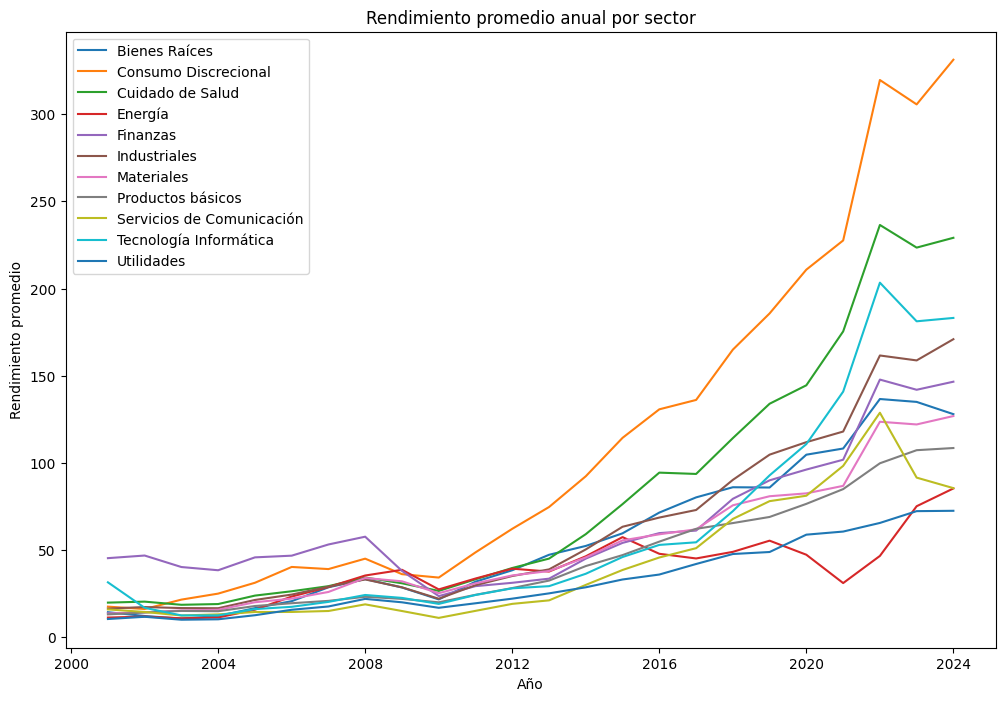

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

# Iterar sobre cada sector y graficar su rendimiento promedio anual
for sector, data in group_data.groupby('Sector'):
    ax.plot(data['Date'], data['Adj Close'], label=sector)

# Agregar un título y etiquetas a los ejes
ax.set_title('Rendimiento promedio anual por sector')
ax.set_xlabel('Año')
ax.set_ylabel('Rendimiento promedio')
ax.legend()

plt.show()

## Extraemos datos de las tecnologicas con las cuales vamos a trabajar

## Extraemos 3 empresas tecnologicas 

In [ ]:
amzn = yf.download('AMZN', start='2000-01-01')
amzn = amzn.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

amzn['Dias'] = amzn['Date'].dt.dayofweek.map(dias)

amzn

In [ ]:
amzn.to_csv('cvx.csv', index = False)

In [ ]:
print(amzn.dtypes)

In [ ]:
aapl = yf.download('AAPL', start='2000-01-01')

In [3]:
msft = yf.download('MSFT', start='2000-01-01')
msft = msft.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

msft['Dias'] = msft['Date'].dt.dayofweek.map(dias)

msft

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.361572,53228400,Lunes
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.133259,54119000,Martes
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.503700,64059600,Miercoles
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.314396,54976600,Jueves
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,34.762825,62013600,Viernes
...,...,...,...,...,...,...,...,...
5840,2023-03-21,274.880005,275.000000,269.519989,273.779999,273.779999,34558700,Martes
5841,2023-03-22,273.399994,281.040009,272.179993,272.290009,272.290009,34873300,Miercoles
5842,2023-03-23,277.940002,281.059998,275.200012,277.660004,277.660004,36610900,Jueves
5843,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000,Viernes


In [4]:
msft.to_csv('./msft.csv', index = False)

In [5]:
print(msft.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Dias                 object
dtype: object
